In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import json
import re 
import time
from pandas.io.json import json_normalize
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
roster = pd.read_csv("C:/Users/Aaron/Desktop/loldfs/OBJECTIVE_ONE_full-roster.csv")
champDic = open("C:/Users/Aaron/Desktop/loldfs/OBJECTIVE_ONE_champion_ID.pkl", "rb")
champId = pickle.load(champDic)

In [3]:
roster.info()
roster.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185702 entries, 0 to 185701
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   team     185702 non-null  int64
 1   winStat  185702 non-null  bool 
 2   p1       185702 non-null  int64
 3   p2       185702 non-null  int64
 4   p3       185702 non-null  int64
 5   p4       185702 non-null  int64
 6   p5       185702 non-null  int64
 7   gameId   185702 non-null  int64
dtypes: bool(1), int64(7)
memory usage: 10.1 MB


,team,winStat,p1,p2,p3,p4,p5,gameId
0,100,False,7,350,266,517,110,4247263043
1,100,True,236,245,350,110,57,4247155821
2,100,False,235,60,223,112,58,4243963257
3,100,False,111,142,236,78,98,4241678498
4,100,True,145,875,236,34,60,4241538868


In [4]:
champId = {int(k):str(v) for k,v in champId.items()}
winDF = roster["winStat"]
rNames = roster.drop(["winStat"], axis = 1)
rNames = rNames.replace(champId)
rNames = pd.concat([winDF, rNames], axis = 1)
rNames

,winStat,team,p1,p2,p3,p4,p5,gameId
0,False,100,LeBlanc,Yuumi,Aatrox,Sylas,Varus,4247263043
1,True,100,Lucian,Ekko,Yuumi,Varus,Maokai,4247155821
2,False,100,Senna,Elise,Tahm Kench,Viktor,Renekton,4243963257
3,False,100,Nautilus,Zoe,Lucian,Poppy,Shen,4241678498
4,True,100,Kai'Sa,Sett,Lucian,Anivia,Elise,4241538868
...,...,...,...,...,...,...,...,...
185697,True,200,Ashe,Zed,Zac,Senna,Mordekaiser,4039738326
185698,False,200,Zilean,Ornn,Aphelios,Senna,Ekko,4170286047
185699,False,200,Vladimir,Nautilus,Rek'Sai,Ornn,Ezreal,4136207327
185700,False,200,Nidalee,Irelia,Yasuo,Renekton,Volibear,4130964458


In [5]:
p1 = pd.get_dummies(rNames["p1"])
p2 = pd.get_dummies(rNames["p2"])
p3 = pd.get_dummies(rNames["p3"])
p4 = pd.get_dummies(rNames["p4"])
p5 = pd.get_dummies(rNames["p5"])

oneHot = p1 + p2 + p3 + p4 + p5
oneHot

,Aatrox,Ahri,Akali,Alistar,Amumu,Anivia,Annie,Aphelios,Ashe,Aurelion Sol,...,Xin Zhao,Yasuo,Yorick,Yuumi,Zac,Zed,Ziggs,Zilean,Zoe,Zyra
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185697,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
185698,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
185699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185700,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [6]:
oneHot["sum"] = oneHot.sum(axis = 1)
oneHot["sum"].value_counts()

5    185702
Name: sum, dtype: int64

In [7]:
objONEencoded = pd.concat([rNames, oneHot], axis = 1)
objONE = objONEencoded.drop(["team", "gameId", "sum", "p1", "p2", "p3", "p4", "p5"], axis = 1)
objONE

,winStat,Aatrox,Ahri,Akali,Alistar,Amumu,Anivia,Annie,Aphelios,Ashe,...,Xin Zhao,Yasuo,Yorick,Yuumi,Zac,Zed,Ziggs,Zilean,Zoe,Zyra
0,False,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,True,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,True,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185697,True,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
185698,False,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
185699,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185700,False,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [8]:
label = winDF
feat = oneHot.drop(["sum"], axis = 1)

ft_train, ft_test, lb_train, lb_test = train_test_split(feat, label, test_size = 0.5, random_state = 42)

In [9]:
#
#
#
#
#

In [10]:
#DECISION TREE CLASSIFIER

start = time.time()

dt = tree.DecisionTreeClassifier()
dt.fit(ft_train, lb_train.values.ravel())
dtPred = dt.predict(ft_test)

end = time.time()

DTA = metrics.accuracy_score(lb_test, dtPred)
print(DTA)
print(f"Training time is {end - start} seconds")

0.5053472768198511
Training time is 6.949089050292969 seconds


In [11]:
'''tree.plot_tree(dt) '''

'tree.plot_tree(dt) '

In [12]:
#
#
#
#
#

In [13]:
#NAIVE BAYES

start = time.time()

nb = GaussianNB()
nb.fit(ft_train, lb_train.values.ravel())
nbPred = nb.predict(ft_test)

end = time.time()

NBA = metrics.accuracy_score(lb_test, nbPred)
print(NBA)
print(f"Training time is {end - start} seconds")

0.5199728597430292
Training time is 0.4328429698944092 seconds


In [14]:
#
#
#
#
#

In [15]:
#RANDOM FOREST CLASSIFIER

start = time.time()

rf = RandomForestClassifier()
rf.fit(ft_train, lb_train.values.ravel())
rfPred = rf.predict(ft_test)

end = time.time()

RFA = metrics.accuracy_score(lb_test, rfPred)
print(RFA)
print(f"Training time is {end - start} seconds")

0.5127246879408945
Training time is 52.19978070259094 seconds


In [16]:
#remove new champions from 149th to 156th
nameList = list(champId.values())
newChamps = {"Lillia", "Yone", "Samira", "Seraphine", "Rell", "Viego", "Gwen", "Akshan"}
namel = [ele for ele in nameList if ele not in newChamps]
len(namel)

148

Text(0.5, 1.0, 'The most impactful champions Season 10 according to Random Forest')

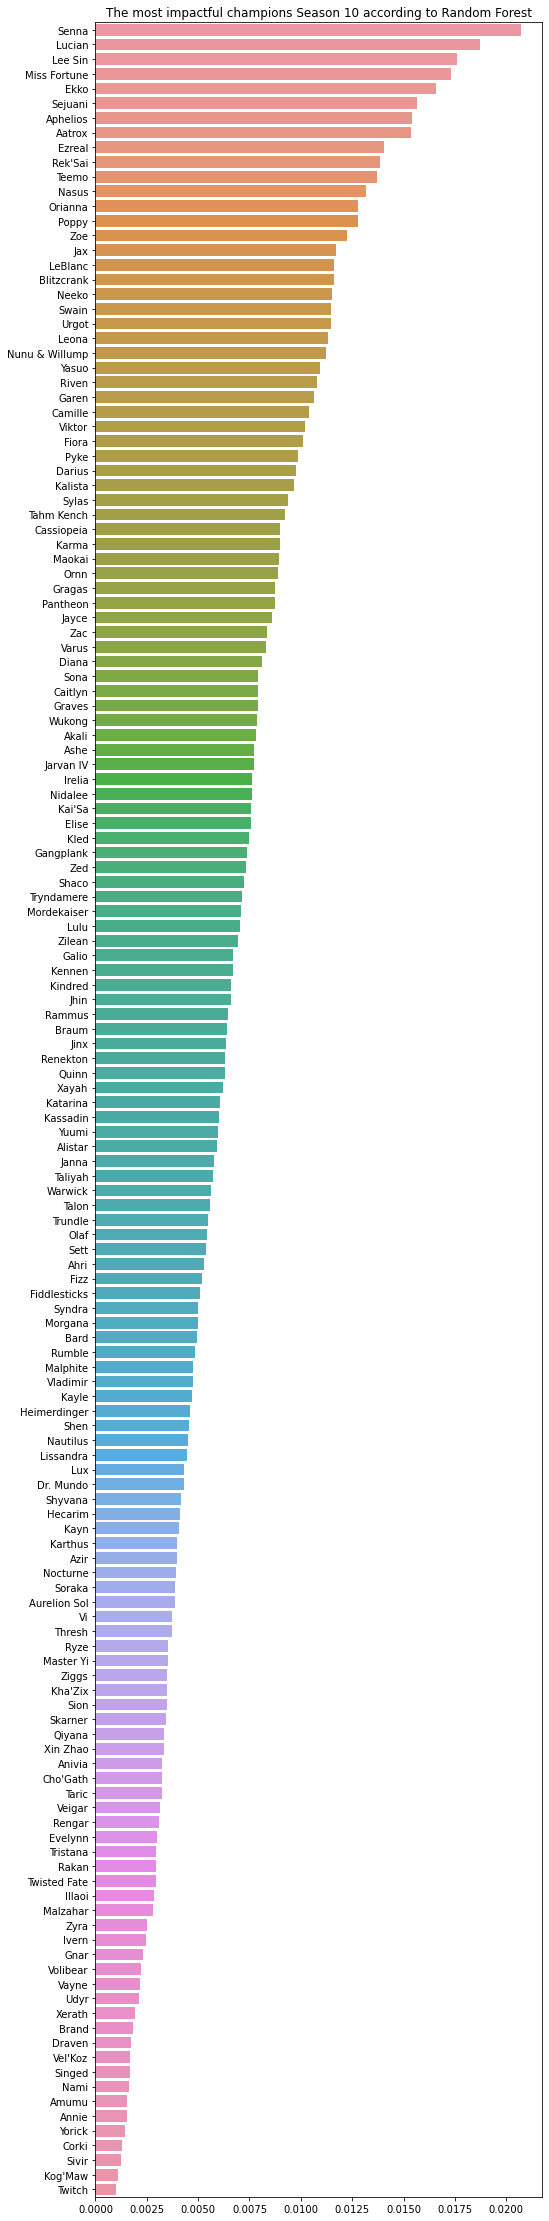

In [30]:
#feature importance
feature_score = pd.Series(rf.feature_importances_, index = namel).sort_values(ascending = False)

fig_dims = (8, 40)
fig, ax = plt.subplots(figsize = fig_dims)
sns.barplot(x = feature_score, y = feature_score.index, ax = ax)
ax.set_title("The most impactful champions Season 10 according to Random Forest")

In [32]:
#
#
#
#
#

In [19]:
#LOGISTIC REGRESSION

start = time.time()

logReg = LogisticRegression(solver = "liblinear")
logReg.fit(ft_train, lb_train.values.ravel())
lrPred = logReg.predict(ft_test)

end = time.time()

LRA = metrics.accuracy_score(lb_test, rfPred)
print(LRA)
print(f"Training time is {end - start} seconds")

0.5127246879408945
Training time is 0.42186951637268066 seconds


Text(0.5, 257.44, 'Predicted label')

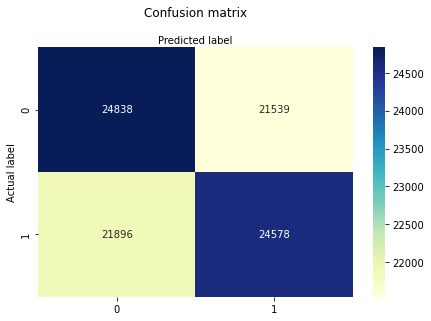

In [20]:
#confusion matrix
cnf_matrix = metrics.confusion_matrix(lb_test, lrPred)
cnf_matrix

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
#
#
#
#
#

In [22]:
#EXTREME GRADIENT BOOST
start = time.time()

xgbc = XGBClassifier(use_label_encoder = False, eval_metric = 'mlogloss')
xgbc.fit(ft_train, lb_train.values.ravel())
xgbcPred = xgbc.predict(ft_test)

end = time.time()

XGBA = metrics.accuracy_score(lb_test, xgbcPred)
print(XGBA)
print(f"Training time is {end - start} seconds")

0.526822543645195
Training time is 10.411152362823486 seconds


Text(0.5, 1.0, 'The most impactful champions Season 10 according to XGBoost')

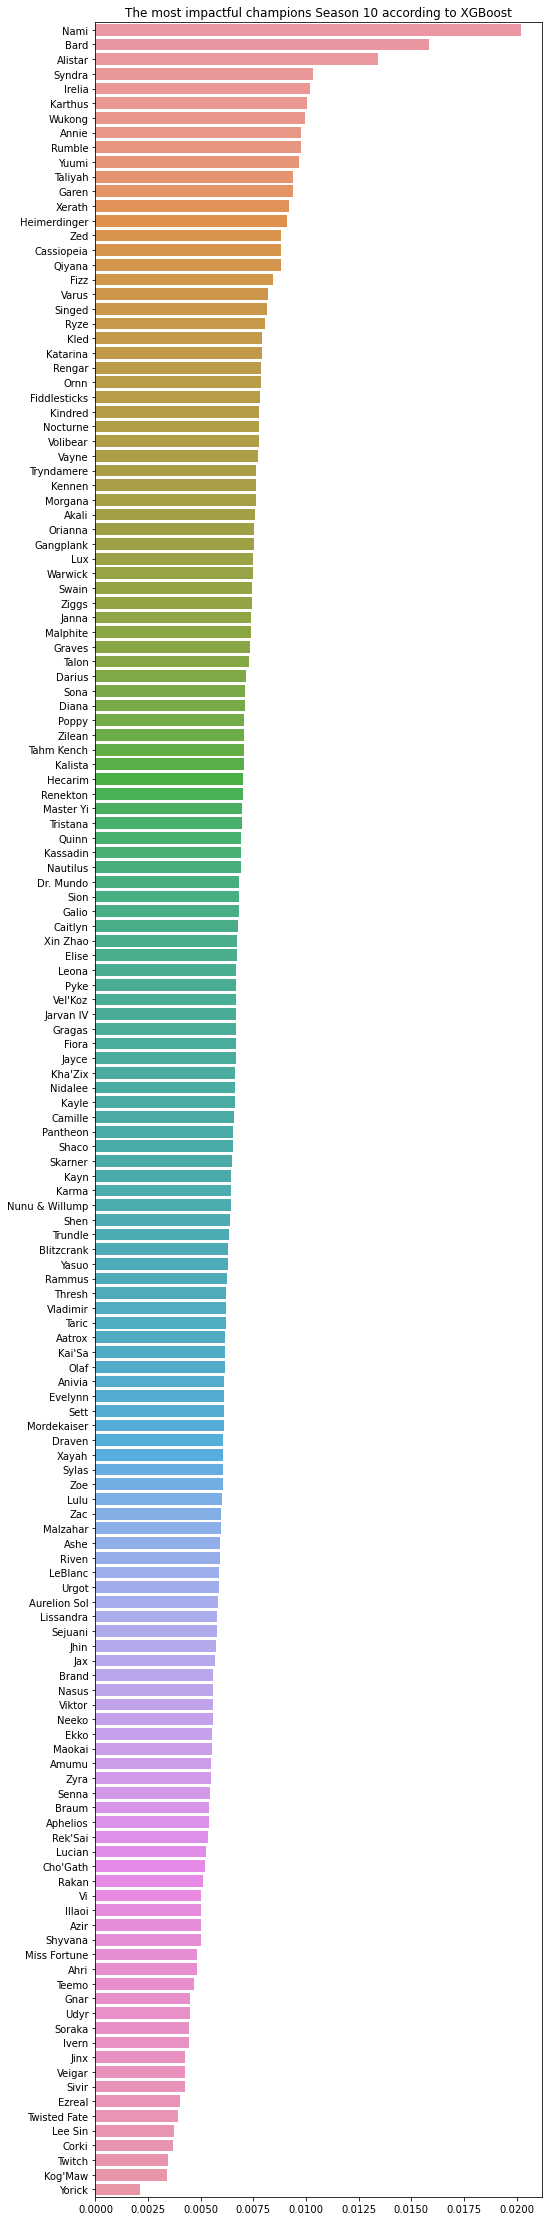

In [34]:
#XGB feature importance
feature_score = pd.Series(xgbc.feature_importances_, index = namel).sort_values(ascending = False)

fig_dims = (8, 40)
fig, ax = plt.subplots(figsize = fig_dims)
sns.barplot(x = feature_score, y = feature_score.index, ax = ax)
ax.set_title("The most impactful champions Season 10 according to XGBoost")

In [24]:
#
#
#
#
#

In [25]:
#ACCURACY OVERVIEW
DT = "{:.2f}".format(DTA*100)+"%"
NB = "{:.2f}".format(NBA*100)+"%"
RF = "{:.2f}".format(RFA*100)+"%"
LR = "{:.2f}".format(LRA*100)+"%"
XGB = "{:.2f}".format(XGBA*100)+"%"
print(DT, NB, RF, LR, XGB)

50.53% 52.00% 51.27% 51.27% 52.68%


In [26]:
#
#
#
#
#

Decision Tree: ROC AUC = 0.505
Naive Bayes: ROC AUC = 0.532
Random Forest: ROC AUC = 0.519
Logistic Regression: ROC AUC = 0.546
Extreme Gradient Boost: ROC AUC = 0.537


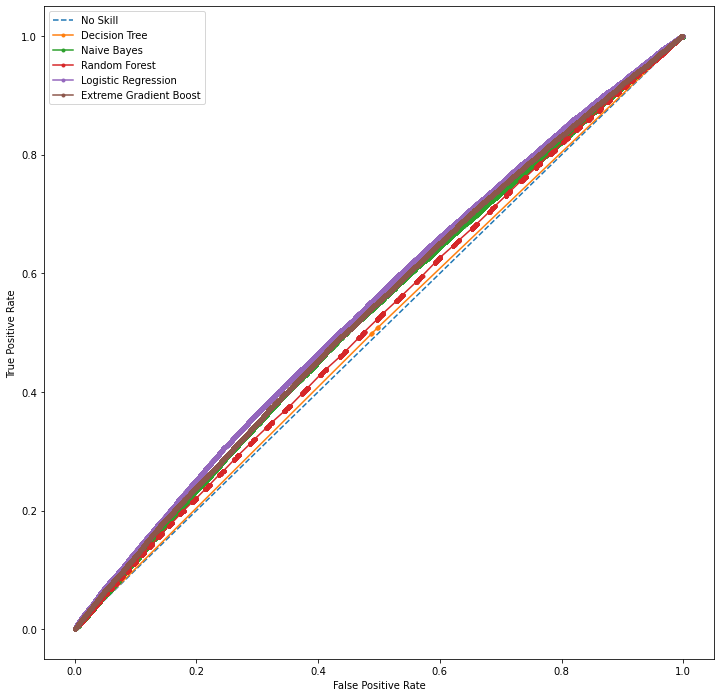

In [40]:
#ROC CURVES PLOT

#plot the no skill line
nsProbs = [0 for _ in range(len(lb_test))]
nsAuc = roc_auc_score(lb_test, nsProbs)
ns_fpr, ns_tpr, _ = roc_curve(lb_test, nsProbs)

#Decision Tree
dtProb = dt.predict_proba(ft_test)
dtProb = dtProb[:, 1]
dtAuc = roc_auc_score(lb_test, dtProb)
print("Decision Tree: ROC AUC = %.3f" % (dtAuc))
dt_fpr, dt_tpr, _ = roc_curve(lb_test, dtProb)

#Naive Bayes
nbProb = nb.predict_proba(ft_test)
nbProb = nbProb[:, 1]
nbAuc = roc_auc_score(lb_test, nbProb)
print("Naive Bayes: ROC AUC = %.3f" % (nbAuc))
nb_fpr, nb_tpr, _ = roc_curve(lb_test, nbProb)

#Random Forest
rfProb = rf.predict_proba(ft_test)
rfProb = rfProb[:, 1]
rfAuc = roc_auc_score(lb_test, rfProb)
print("Random Forest: ROC AUC = %.3f" % (rfAuc))
rf_fpr, rf_tpr, _ = roc_curve(lb_test, rfProb)

#Logistic Regression
lrProb = logReg.predict_proba(ft_test)
lrProb = lrProb[:, 1]
lrAuc = roc_auc_score(lb_test, lrProb)
print("Logistic Regression: ROC AUC = %.3f" % (lrAuc))
lr_fpr, lr_tpr, _ = roc_curve(lb_test, lrProb)

#Extreme Gradient Boost
xgbcProb = xgbc.predict_proba(ft_test)
xgbcProb = xgbcProb[:, 1]
xgbcAuc = roc_auc_score(lb_test, xgbcProb)
print("Extreme Gradient Boost: ROC AUC = %.3f" % (xgbcAuc))
xgbc_fpr, xgbc_tpr, _ = roc_curve(lb_test, xgbcProb)

plt.figure(figsize = (12, 12))

plt.plot(ns_fpr, ns_tpr, linestyle = "--", label = 'No Skill')
plt.plot(dt_fpr, dt_tpr, marker = ".", label = "Decision Tree")
plt.plot(nb_fpr, nb_tpr, marker = ".", label = "Naive Bayes")
plt.plot(rf_fpr, rf_tpr, marker = ".", label = "Random Forest")
plt.plot(lr_fpr, lr_tpr, marker = ".", label = "Logistic Regression")
plt.plot(xgbc_fpr, xgbc_tpr, marker = ".", label = "Extreme Gradient Boost")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [41]:
#
#
#
#
#

In [42]:
objONEencoded.to_csv(r"C:/Users/Aaron/Desktop/loldfs/OBJECTIVE_UNIFIED_ONE_ENCODED.csv", index = False)